In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2018.csv')

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
n = 50
df=df.head(int(len(df)*(n/100)))

In [13]:
n = 50
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [12]:
df.home_win.value_counts(normalize=True)

1    0.510708
0    0.489292
Name: home_win, dtype: float64

In [14]:
df2.home_win.value_counts(normalize=True)

1    0.527183
0    0.472817
Name: home_win, dtype: float64

In [15]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_strikes_swinging,A_Opp_strikes_looking,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
607,SFG,34.203704,3.722222,8.172840,3.537037,3.608025,2.765432,9.055556,37.734568,0.233685,...,15.475309,23.895062,12.679012,14.746914,6.870370,0.000000,51.938272,0.040080,0.070370,1
608,PIT,33.832298,4.298137,8.577640,4.130435,4.054037,2.944099,7.633540,37.677019,0.248329,...,15.055556,24.962963,11.197531,15.561728,6.635802,0.012346,54.080247,0.056796,0.490741,1
609,WSN,34.055556,4.759259,8.654321,4.549383,4.587654,3.895062,7.956790,38.814815,0.247401,...,18.820988,26.407407,10.827160,13.592593,6.000000,0.000000,48.000000,-0.062389,-0.735185,1
610,SEA,34.030864,4.179012,8.654321,3.975309,3.967778,2.654321,7.537037,37.574074,0.248759,...,13.351852,24.629630,12.401235,15.654321,7.148148,0.012346,52.074074,0.044549,0.182099,1
611,MIA,34.086957,3.658385,8.093168,3.440994,3.325901,2.826087,8.596273,37.782609,0.232317,...,17.598765,24.895062,11.567901,13.283951,5.975309,0.000000,50.604938,-0.013623,-0.604938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,CIN,34.148148,4.296296,8.666667,4.104938,4.181481,3.450617,8.493827,38.518519,0.248623,...,16.623457,25.216049,11.290123,13.728395,6.413580,0.012346,50.697531,-0.045049,-0.317284,0
1210,PHI,33.481481,4.179012,7.839506,4.030864,4.050494,3.592593,9.382716,37.876543,0.229772,...,16.283951,24.055556,10.950617,14.450617,6.006173,0.000000,50.617284,0.009531,-0.360494,0
1211,BAL,33.993827,3.839506,8.129630,3.660494,3.702654,2.604938,8.716049,37.246914,0.233407,...,16.314815,25.413580,11.030864,14.320988,6.617284,0.006173,51.277778,0.002444,0.030247,0
1212,SEA,34.030864,4.179012,8.654321,3.975309,3.967778,2.654321,7.537037,37.574074,0.248759,...,13.833333,24.456790,12.364198,15.567901,7.197531,0.012346,52.518519,0.088006,0.638889,1


In [16]:
df

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_strikes_swinging,A_Opp_strikes_looking,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYM,33.753086,4.172840,7.913580,4.006173,3.957531,3.493827,8.666667,38.129630,0.227963,...,16.104938,25.104938,12.265432,14.135802,6.796296,0.012346,50.376543,-0.040932,-0.425309,1
1,TEX,33.660494,4.549383,8.074074,4.296296,4.298580,3.425926,9.160494,38.043210,0.234926,...,18.549383,25.808642,10.456790,12.543210,5.716049,0.006173,48.870370,-0.019704,-0.457407,0
2,MIA,34.086957,3.658385,8.093168,3.440994,3.325901,2.826087,8.596273,37.782609,0.232317,...,15.185185,26.271605,12.117284,13.913580,6.697531,0.012346,51.425926,-0.004728,-0.308642,0
3,KCR,33.981481,3.938272,8.333333,3.740741,3.663580,2.635802,8.086420,37.425926,0.241000,...,15.055556,24.962963,11.197531,15.561728,6.635802,0.012346,54.080247,0.056796,0.490741,0
4,SDP,33.864198,3.808642,7.956790,3.598765,3.550988,2.907407,9.401235,37.401235,0.231272,...,16.623457,25.216049,11.290123,13.728395,6.413580,0.012346,50.697531,-0.045049,-0.317284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,CIN,34.148148,4.296296,8.666667,4.104938,4.181481,3.450617,8.493827,38.518519,0.248623,...,16.623457,25.216049,11.290123,13.728395,6.413580,0.012346,50.697531,-0.045049,-0.317284,0
1210,PHI,33.481481,4.179012,7.839506,4.030864,4.050494,3.592593,9.382716,37.876543,0.229772,...,16.283951,24.055556,10.950617,14.450617,6.006173,0.000000,50.617284,0.009531,-0.360494,0
1211,BAL,33.993827,3.839506,8.129630,3.660494,3.702654,2.604938,8.716049,37.246914,0.233407,...,16.314815,25.413580,11.030864,14.320988,6.617284,0.006173,51.277778,0.002444,0.030247,0
1212,SEA,34.030864,4.179012,8.654321,3.975309,3.967778,2.654321,7.537037,37.574074,0.248759,...,13.833333,24.456790,12.364198,15.567901,7.197531,0.012346,52.518519,0.088006,0.638889,1


In [17]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_strikes_swinging,A_Opp_strikes_looking,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
607,SFG,34.203704,3.722222,8.172840,3.537037,3.608025,2.765432,9.055556,37.734568,0.233685,...,15.475309,23.895062,12.679012,14.746914,6.870370,0.000000,51.938272,0.040080,0.070370,1
608,PIT,33.832298,4.298137,8.577640,4.130435,4.054037,2.944099,7.633540,37.677019,0.248329,...,15.055556,24.962963,11.197531,15.561728,6.635802,0.012346,54.080247,0.056796,0.490741,1
609,WSN,34.055556,4.759259,8.654321,4.549383,4.587654,3.895062,7.956790,38.814815,0.247401,...,18.820988,26.407407,10.827160,13.592593,6.000000,0.000000,48.000000,-0.062389,-0.735185,1
610,SEA,34.030864,4.179012,8.654321,3.975309,3.967778,2.654321,7.537037,37.574074,0.248759,...,13.351852,24.629630,12.401235,15.654321,7.148148,0.012346,52.074074,0.044549,0.182099,1
611,MIA,34.086957,3.658385,8.093168,3.440994,3.325901,2.826087,8.596273,37.782609,0.232317,...,17.598765,24.895062,11.567901,13.283951,5.975309,0.000000,50.604938,-0.013623,-0.604938,1


In [18]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [19]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [20]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [21]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

## Feature Selection

In [22]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

### RFECV

In [23]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 150
criterion: gini
Mean Cross-Val Score: 0.5173145597388021
Train Mean Accuracy: 0.7257001647446458
Test Mean Accuracy: 0.7199341021416804
Recall Score: 0.790625
Precision Score: 0.7106741573033708
F1 score: 0.7485207100591716


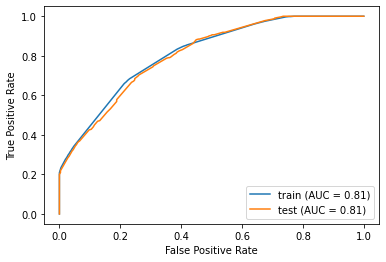

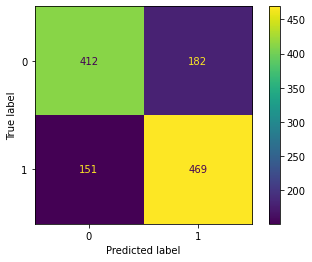

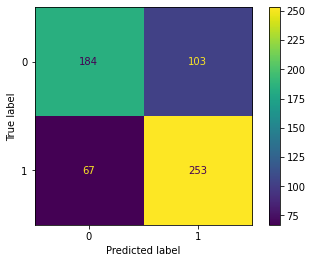

In [24]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [25]:
new_acc(probabilities)

(0.7754677754677755, 373)

### PCA

In [26]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)

Number of Trees: 500
criterion: gini
Mean Cross-Val Score: 0.5486344930789375
Train Mean Accuracy: 0.7257001647446458
Test Mean Accuracy: 0.7182866556836903
Recall Score: 0.778125
Precision Score: 0.7134670487106017
F1 score: 0.7443946188340808


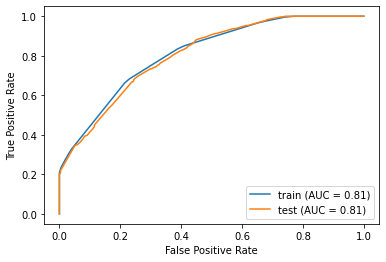

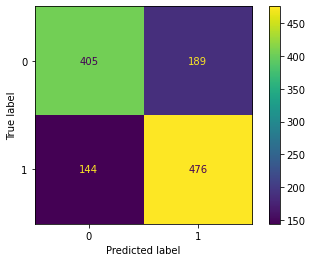

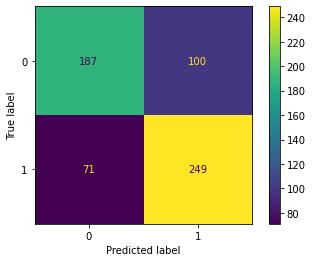

In [27]:
predictions,probabilities=random_forest(train_pca,test_pca,y_train,y_test)

In [28]:
new_acc(probabilities)

(0.7754677754677755, 373)